In [1]:
from AfricaBorderConflictRegression_functions import *

# 1.1 Grid Preperation

### Import Grid Cell Geodataframes
Save grid cells as geodataframe and add unique cell_ID and area (km squared)

grid_10km CRS - ESRI:102022
grid_25km CRS - ESRI:102022
grid_50km CRS - ESRI:102022
grid_100km CRS - ESRI:102022


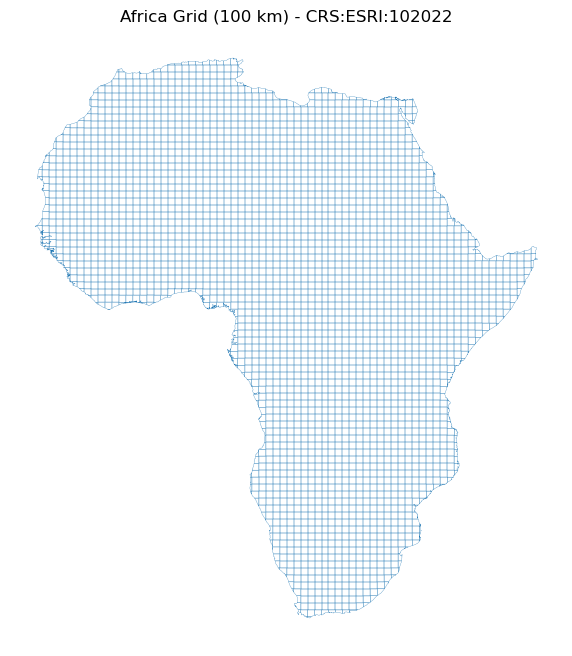

In [2]:
grid_path = "../Data/Grid_data/Africa_grid_102022.gpkg"
layers = fiona.listlayers(grid_path)
# import dataframes from geopackage layers with CRS set to Africa Equal-Area Conic (ESRI:102022)
if len(layers) == 4:
    for layer in layers:
        if layer == "africa_grid_10km":
            grid_10km = save_grid_gdf(grid_path, layer, "ESRI:102022")
        if layer == "africa_grid_25km":
            grid_25km = save_grid_gdf(grid_path, layer, "ESRI:102022")
        if layer == "africa_grid_50km":
            grid_50km = save_grid_gdf(grid_path, layer, "ESRI:102022")
        if layer == "africa_grid_100km":
            grid_100km = save_grid_gdf(grid_path, layer, "ESRI:102022")
else:
    print("Please import grid geopackage with 10km, 25km, 50km and 100km grid resolutions")
# verify crs
print(f"grid_10km CRS - {grid_10km.crs}")
print(f"grid_25km CRS - {grid_25km.crs}")
print(f"grid_50km CRS - {grid_50km.crs}")
print(f"grid_100km CRS - {grid_100km.crs}")
# Visualize grid cells
fig, ax = plt.subplots(figsize=(8, 8))
grid_100km.boundary.plot(ax=ax, linewidth=0.2)
ax.set_title(f"Africa Grid (100 km) - CRS:{grid_100km.crs}")
ax.set_axis_off()
plt.show()

### Identify coastal cells

In [3]:
grid_10km = coastal_binary(grid_10km, full_cell_area=100)
grid_25km = coastal_binary(grid_25km, full_cell_area=625)
grid_50km = coastal_binary(grid_50km, full_cell_area=2500)
grid_100km = coastal_binary(grid_100km, full_cell_area=10000)
grid_10km.head()

,id,left,top,right,bottom,row_index,col_index,geometry,cell_id,area_km2,is_coastal
0,241,-4.440354e+06,1.694190e+06,-4.430354e+06,1.684190e+06,240,0,"MULTIPOLYGON (((-4438668.496 1685614.099, -444...",0,40.913185,1
1,242,-4.440354e+06,1.684190e+06,-4.430354e+06,1.674190e+06,241,0,"MULTIPOLYGON (((-4431485.105 1676494.905, -443...",1,32.444992,1
2,1042,-4.430354e+06,1.704190e+06,-4.420354e+06,1.694190e+06,239,1,"MULTIPOLYGON (((-4420354.478 1694991.355, -442...",2,0.357439,1
3,1043,-4.430354e+06,1.694190e+06,-4.420354e+06,1.684190e+06,240,1,"MULTIPOLYGON (((-4422310.661 1685092.152, -442...",3,69.284336,1
4,1044,-4.430354e+06,1.684190e+06,-4.420354e+06,1.674190e+06,241,1,"MULTIPOLYGON (((-4430237.063 1683369.85, -4429...",4,9.327453,1


# !!! export data !!!

In [4]:
grid_list = {"grid_10km_102022": grid_10km, "grid_25km_102022": grid_25km, "grid_50km_102022": grid_50km, "grid_100km_102022": grid_100km}
for layer, gdf in grid_list.items():
    export_geopackage(gdf, "../Data/Regression_data/Africa-border-conflict_regression-data_102022.gpkg", layer)